In [1]:
#%config IPCompleter.use_jedi=False
%load_ext autoreload
%autoreload 2

In [2]:
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

from pandas._libs.tslibs.timestamps import Timestamp
from pandas.core.frame import DataFrame
from pandas.core.series import Series
from matplotlib.axes._axes import Axes

sys.path.append('..')
from cyclingEfficiency import Reader, Paths, Clean

## EDA
Después de la limpieza, se crea una clase 'Clean' que condensa los pasos del notebook anterior. Ahora el objetivo es observar cómo se comportan los datos después de la limpieza.

In [10]:
data = Clean(
    hr_max=190,
    kph_greater=2,
    cad_greater_than_equal=40,
    hr_grater=0,
    slope_greater_than_equal=0,
    zone_grater_than_equal=1,
    before=False
).data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611005 entries, 0 to 611004
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   secs      611005 non-null  int64         
 1   cad       611005 non-null  float64       
 2   hr        611005 non-null  float64       
 3   km        611005 non-null  float64       
 4   kph       611005 non-null  float64       
 5   watts     611005 non-null  float64       
 6   alt       611005 non-null  float64       
 7   lon       611005 non-null  float64       
 8   lat       611005 non-null  float64       
 9   slope     611005 non-null  float64       
 10  temp      611005 non-null  float64       
 11  datetime  611005 non-null  datetime64[us]
 12  date      611005 non-null  datetime64[us]
 13  weight    611005 non-null  float64       
 14  zones     611005 non-null  int64         
 15  is_plain  611005 non-null  int64         
dtypes: datetime64[us](2), float64(11), int

In [11]:
data.describe()

,secs,cad,hr,km,kph,watts,alt,lon,lat,slope,temp,datetime,date,weight,zones,is_plain
count,611005.000000,611005.000000,611005.000000,611005.000000,611005.000000,611005.000000,611005.000000,611005.000000,611005.000000,611005.000000,611005.000000,611005,611005,611005.000000,611005.000000,611005.000000
mean,9191.721812,76.492793,146.498905,39.448559,15.921933,1.187143,2122.208486,-72.854789,4.855322,4.849220,17.530167,2023-02-19 11:51:50.664533,2023-02-19 04:40:25.944141,63.603848,2.794275,0.193866
min,2.000000,40.000000,95.000000,0.002100,2.001600,0.000000,0.000000,-75.326690,0.000000,0.000000,4.000000,2018-02-25 08:49:59,2018-02-25 00:00:00,60.500000,1.000000,0.000000
25%,3602.000000,71.000000,129.000000,17.008300,10.584000,0.000000,1464.200000,-74.376400,4.851477,1.857140,14.000000,2022-08-21 07:44:10,2022-08-21 00:00:00,62.300000,2.000000,0.000000
50%,8621.000000,77.000000,150.000000,38.452500,13.608000,0.000000,2558.200000,-74.297619,4.928683,5.477670,16.000000,2023-03-19 08:05:09,2023-03-19 00:00:00,63.400000,2.000000,0.000000
75%,13518.000000,83.000000,166.000000,55.230100,19.656000,0.000000,2645.600000,-74.193712,5.021413,7.142860,21.000000,2023-07-30 08:16:43,2023-07-30 00:00:00,64.600000,4.000000,0.000000
max,41307.000000,131.000000,195.000000,150.478000,62.737200,396.000000,3520.200000,0.000000,6.023315,36.555600,40.000000,2024-03-17 07:55:21,2024-03-17 00:00:00,70.600000,5.000000,1.000000
std,6376.221529,9.771378,23.094749,25.923438,7.091749,15.069126,740.539500,10.163543,0.710931,3.143063,5.503248,NaN,NaN,1.675694,1.365138,0.395325


### Análisis Unidimensional
Se realizarán histogramas para observar el comportamiento de las variables más relevantes.
- secs = Segundos de actividad
- cad = Cadencia
- hr = Frecuencia cardíaca
- km = Kilometraje
- kph = Kilómetros por hora
- alt = Altitud
- slope = Desnivel
- temp = Temperatura
- weight = Peso del ciclista
- zones = Zona cardiacar

In [12]:
def hist(
        df: DataFrame, column: str, bins: int='auto',
        hue: str = None
    )-> None:

    format = lambda value, tick_number: '{:,.2f}'.format(value)

    beta_y: float = 0.9
    beta_x: float = 0.01

    mean: float = df[column].mean()
    median: float = df[column].median()
    plt.figure(figsize=(8, 5))
    graph: Axes = sns.histplot(
        data=df,
        x=column,
        bins=bins,
        hue=hue,
        multiple='stack'
    )
    ylim: float = graph.get_ylim()[1]
    graph.yaxis.set_major_formatter(FuncFormatter(format))
    graph.xaxis.set_major_formatter(FuncFormatter(format))
    xrange: float = graph.get_xlim()[1] - graph.get_xlim()[0]

    
    plt.axvline(mean, label='Mean', color='#DD0000')
    plt.axvline(median, label='Median', color='#22AA22')
    plt.text(
        mean + xrange * beta_x, ylim * beta_y, '{:,.2f}'.format(mean)
    )
    plt.text(
        median + xrange * beta_x, ylim * beta_y**2, '{:,.2f}'.format(median)
    )
    plt.title('Hist {}'.format(column.upper()))
    plt.legend()
    plt.show()

/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


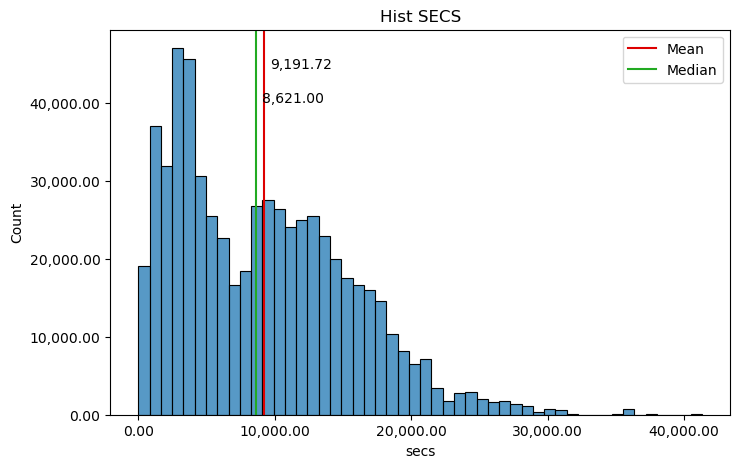

/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


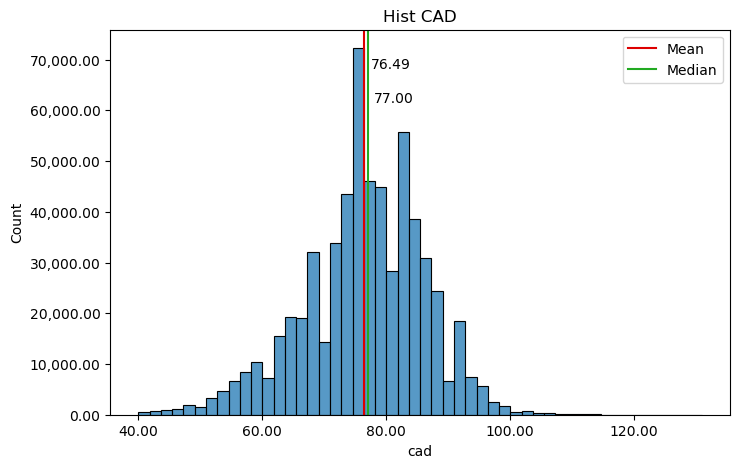

/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


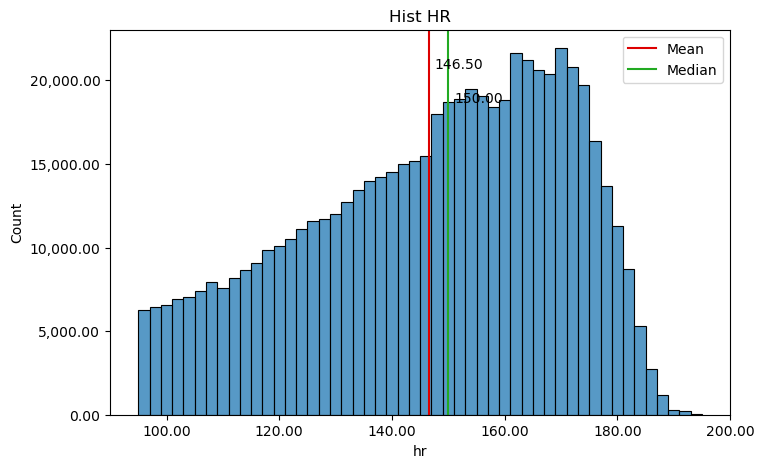

/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


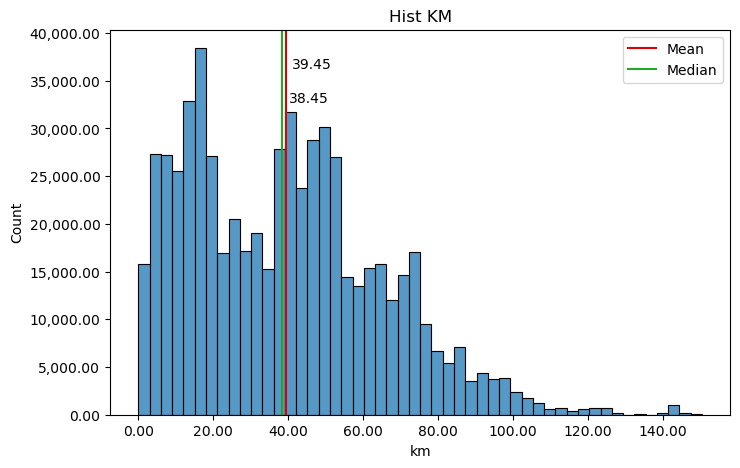

/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


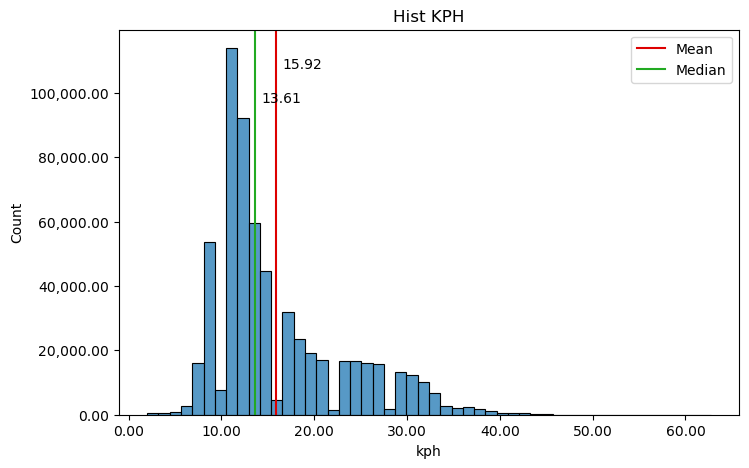

/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


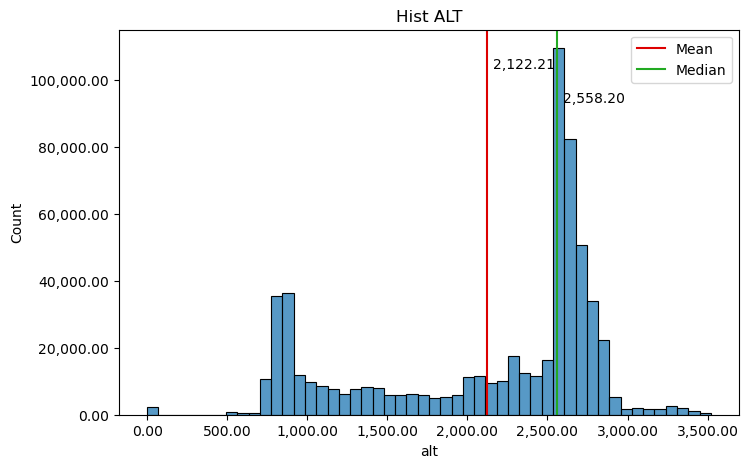

/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


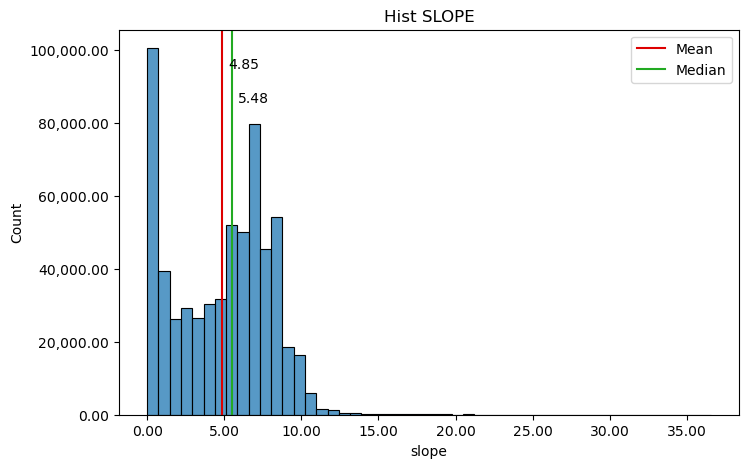

/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


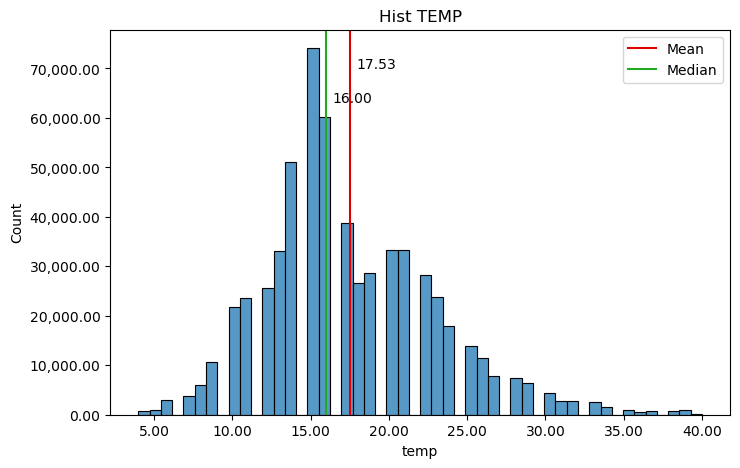

/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


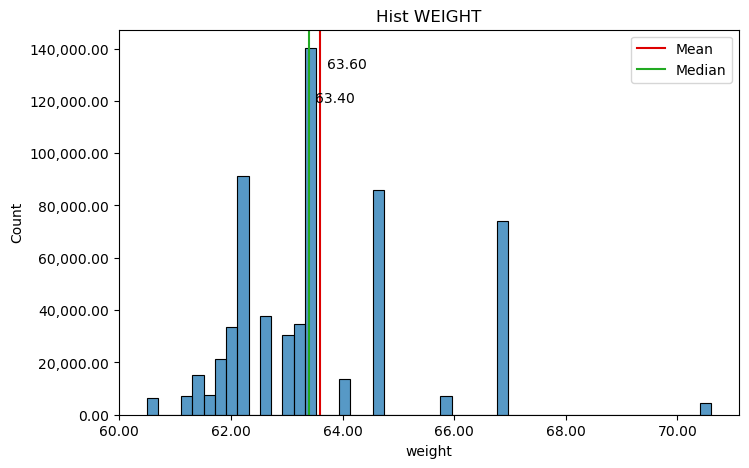

/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaor/Programs/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


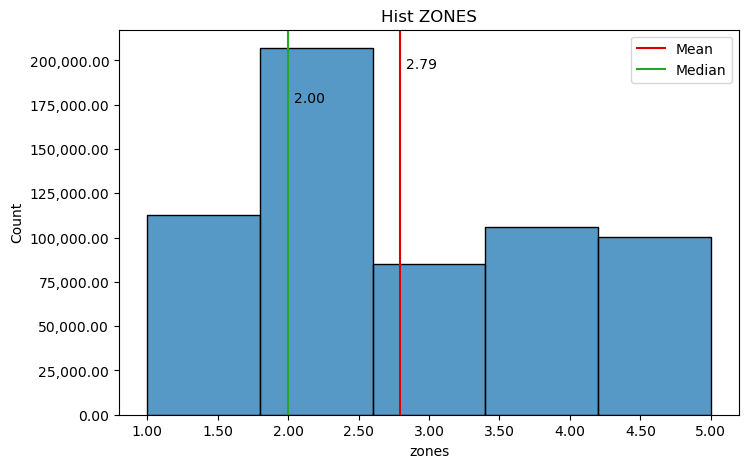

In [13]:
for column in [
    'secs', 'cad', 'hr', 'km', 'kph', 
    'alt', 'slope', 'temp', 'weight',
]:
    hist(data, column, bins=50)

hist(data, 'zones', bins=5)

### Análisis Multidimensional
Para este punto, se graficarán las variables que suponemos pueden tener una mayor relación.

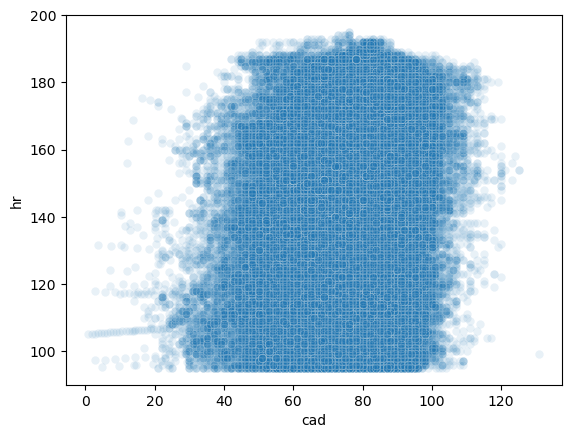

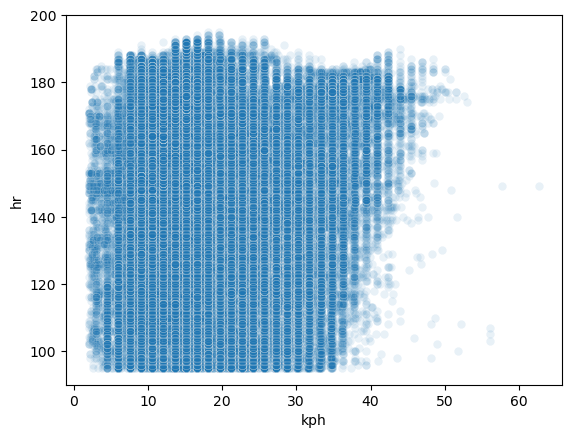

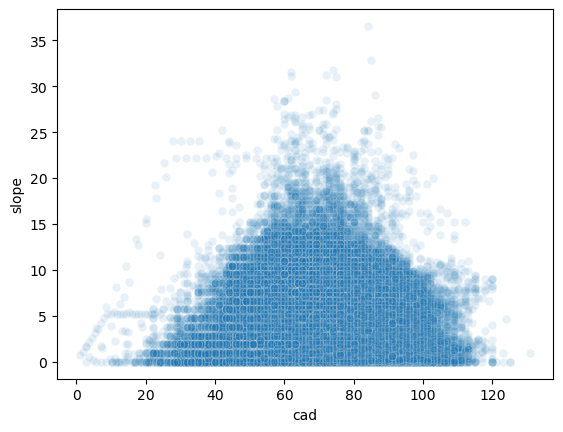

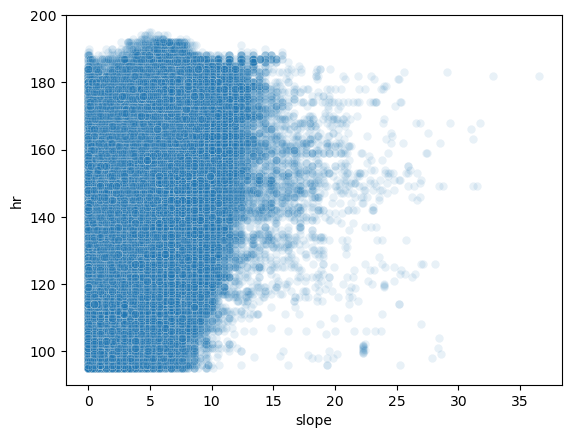

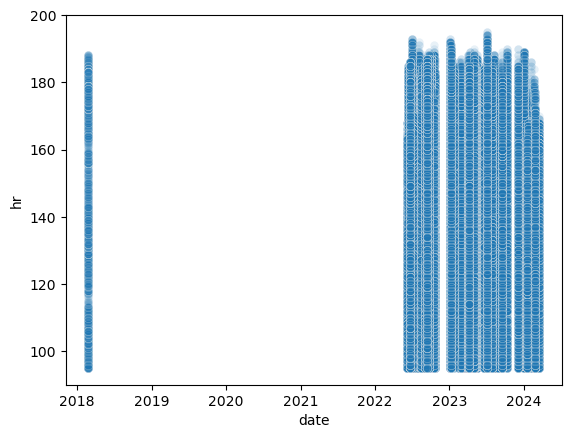

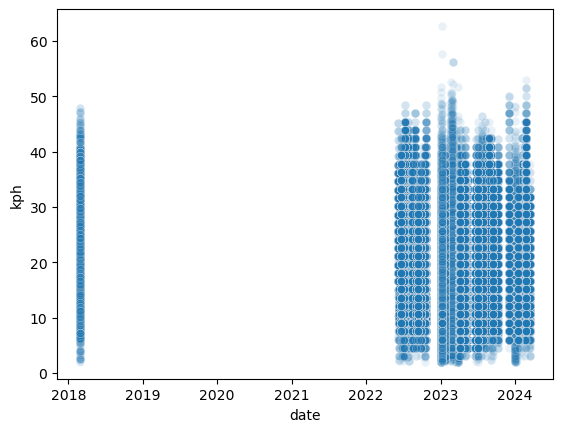

In [7]:
tuples: tuple[tuple[str]] = (
    ('cad', 'hr'),
    ('kph', 'hr'),
    ('cad', 'slope'),
    ('slope', 'hr'),
    ('date', 'hr'),
    ('date', 'kph'),
)

for x, y in tuples:
    sns.scatterplot(
        data,
        x=x,
        y=y,
        alpha=1/10
    )
    plt.show()

Solo se ve un patron en la relacion de slope y cad

Con el objetivo de comprender y validar relaciones que posiblemente no se tuvieron en cuenta, se realizará una matriz de correlación. Posteriormente, se graficarán las variables que tengan mayor relación.

In [8]:
corr = data.corr(numeric_only=True)

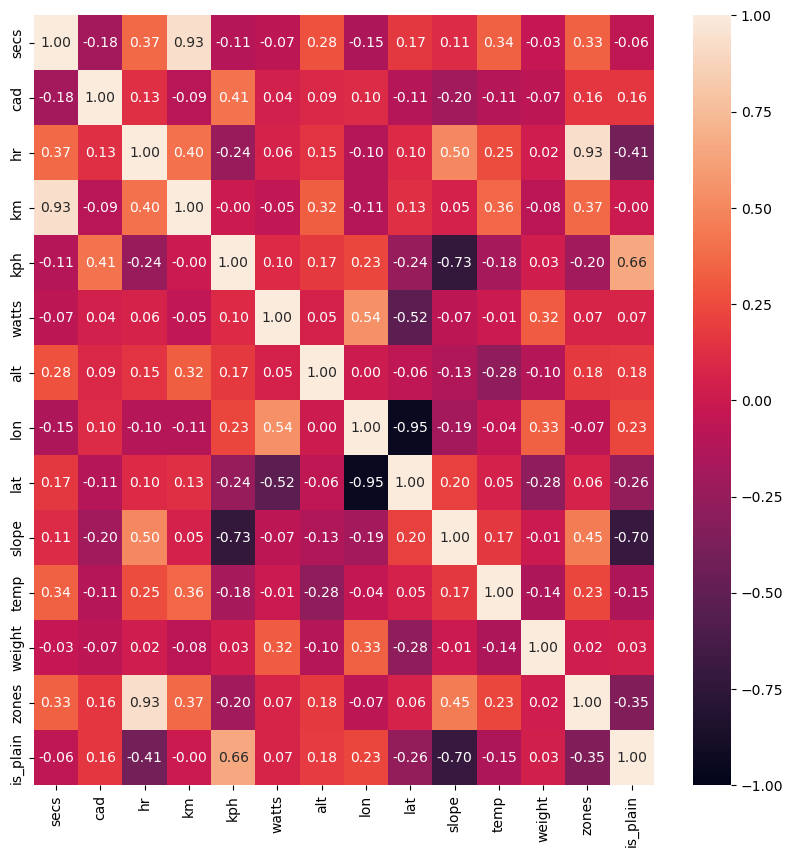

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(
    corr,
    vmax=1,
    vmin=-1,
    fmt='.2f',
    annot=True

)
plt.show()

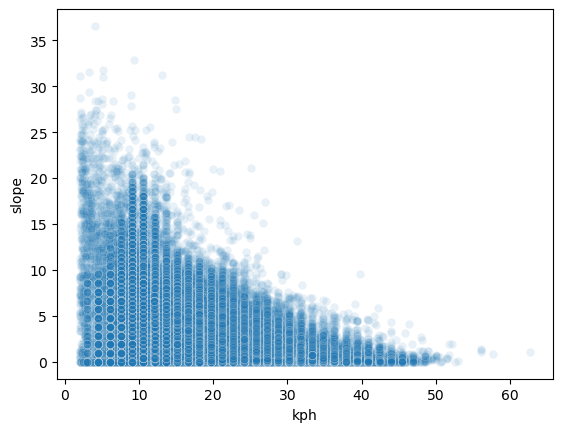

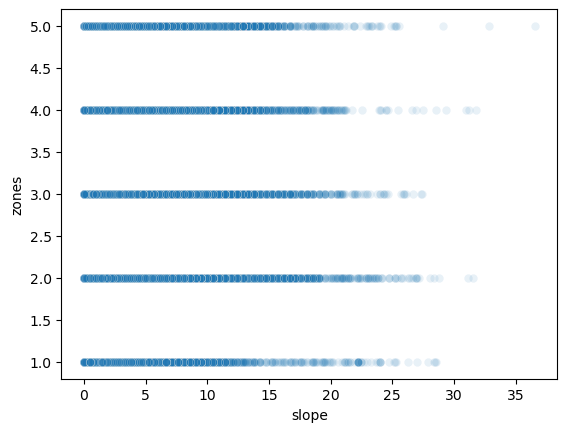

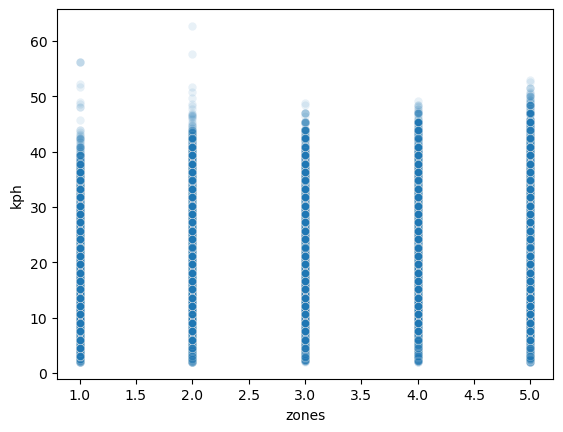

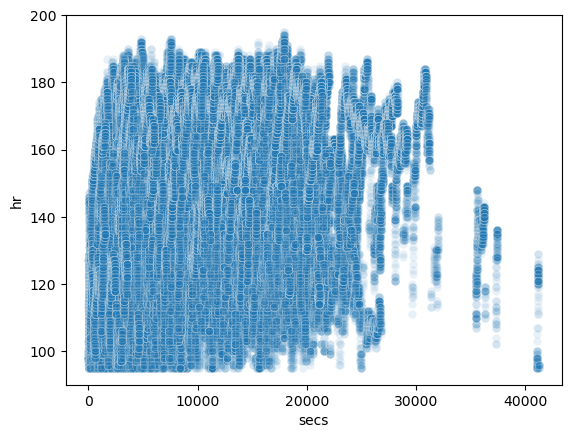

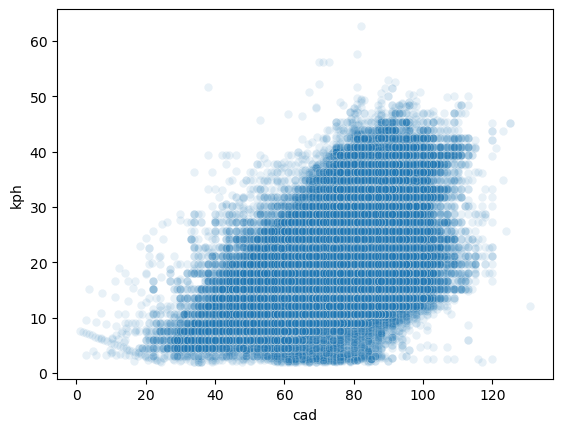

In [10]:
tuples: tuple[tuple[str]] = (
    ('kph', 'slope'),
    ('slope', 'zones'),
    ('zones', 'kph'),
    ('secs', 'hr'),
    ('cad', 'kph'),
)

for x, y in tuples:
    sns.scatterplot(
        data,
        x=x,
        y=y,
        alpha=1/10
    )
    plt.show()

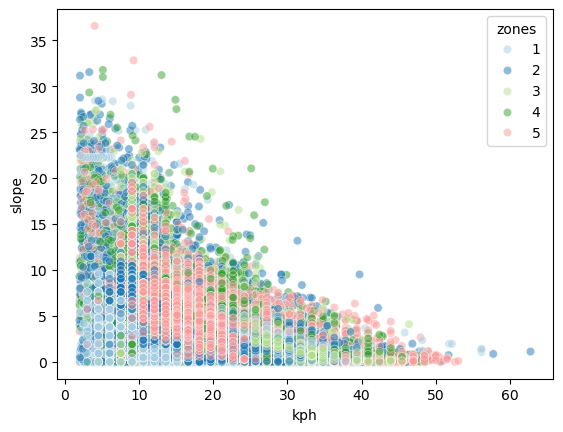

In [11]:
sns.scatterplot(
    data,
    x='kph',
    y='slope',
    alpha=1/2,
    hue='zones',
    palette='Paired'
)
plt.show()

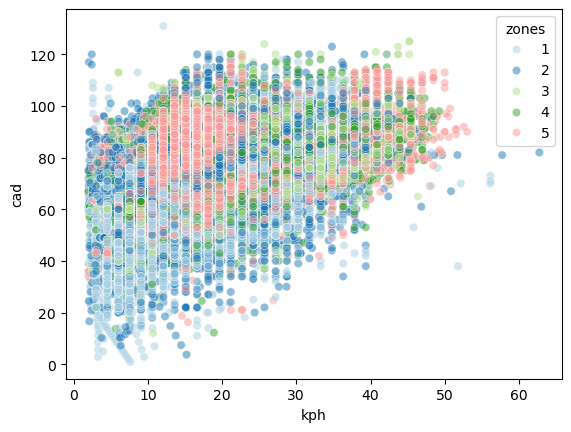

In [12]:
sns.scatterplot(
    data,
    x='kph',
    y='cad',
    alpha=1/2,
    hue='zones',
    palette='Paired'
)
plt.show()

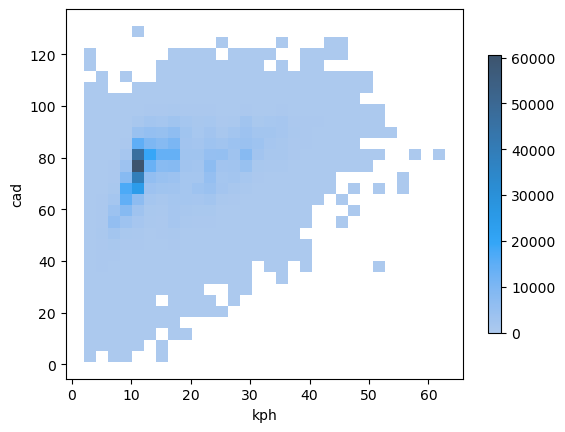

In [13]:
sns.histplot(
    data, x="kph", y="cad",
    bins=30, discrete=(False, False), 
    cbar=True, cbar_kws=dict(shrink=.75),
)
plt.show()

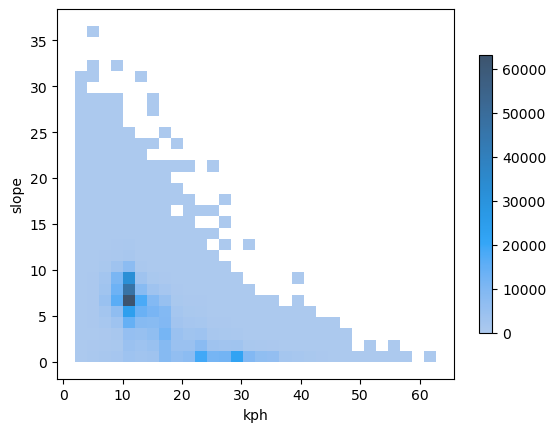

In [14]:
sns.histplot(
    data, x="kph", y="slope",
    bins=30, discrete=(False, False), 
    cbar=True, cbar_kws=dict(shrink=.75),
)
plt.show()

En este caso, como no se cuenta con un sensor de potencia que permita determinar los watts utilizados, se utilizará la función de trabajo mecánico, en la que se tendrá en cuenta la fuerza de resistencia a la rodadura y la fuerza gravitatoria necesaria para superar la pendiente. Sin embargo, dado que no se dispone de información del aire, no se podrá determinar la fuerza de resistencia al aire. En la veriable crr se agregará una constante para edicionar los efectos que no son tenidos en cuenta.


In [15]:
# https://www.triatlonrosario.com/2010/04/eleccion-de-neumaticos-para-bicicleta.html
def generate_w(
        slope: float, mass: float, 
        velocity_km_h: float, crr: float= 0.021
    ) -> float:
        gravity: float = 9.8
        if slope > 0:
            angle_radians: float = np.arctan(slope/100)
            f_g: float = mass * gravity * np.sin(angle_radians)
        else:
            f_g: float = 0
        f_r: float = mass * gravity * crr
        d: float = velocity_km_h * 1000 / (60 * 60)
        return d * (f_r + f_g)


In [16]:
bike_weight: float  = 11
data['w'] = data.apply(
    lambda x: generate_w(
        slope=x['slope'],
        mass=x['weight'] + bike_weight,
        velocity_km_h=x['kph']
    ),
    axis=1
)

Para continuar el análisis, se validará la relación que tiene la fuerza mecánica con la variable que termina si es terreno llano o terreno con elevación. Además, también se validará con otras variables.

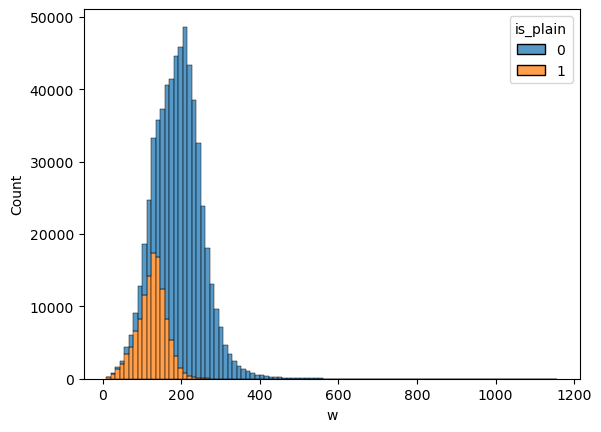

In [17]:
sns.histplot(
    data,
    x='w',
    hue='is_plain',
    bins=100,
    multiple='stack'
)
plt.show()

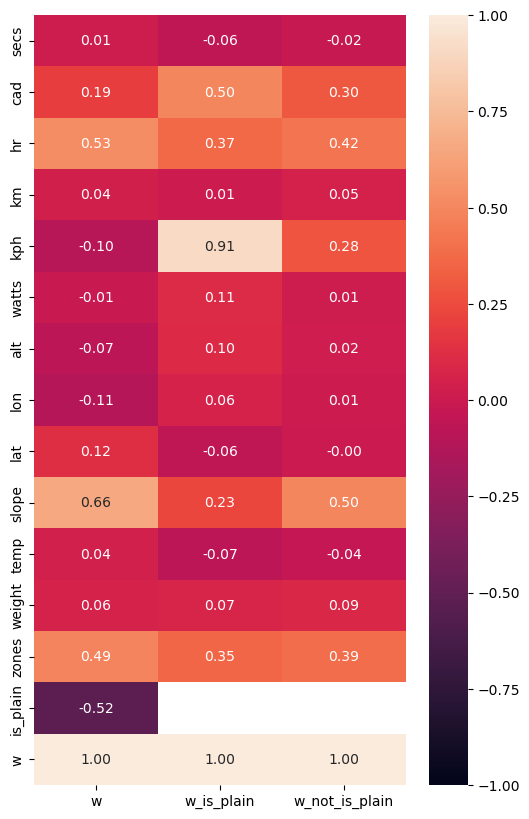

In [18]:
corr_full: DataFrame = data.corr(numeric_only=True)[['w']]
corr_is_plain: DataFrame = data[data['is_plain'] == 1].corr(
    numeric_only=True
)[['w']].rename(
    columns={
        'w': 'w_is_plain'
    }
)
corr_not_is_plain: DataFrame = data[data['is_plain'] == 0].corr(
    numeric_only=True
)[['w']].rename(
    columns={
        'w': 'w_not_is_plain'
    }
)

corr: DataFrame = pd.concat(
    [corr_full, corr_is_plain, corr_not_is_plain],
    axis=1
)



plt.figure(figsize=(6,10))
sns.heatmap(
    corr,
    vmax=1,
    vmin=-1,
    fmt='.2f',
    annot=True

)
plt.show()

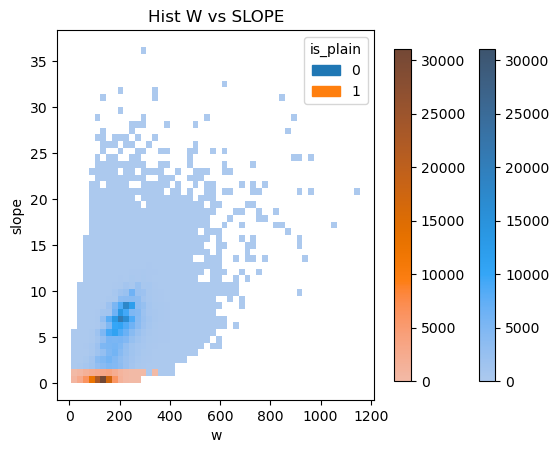

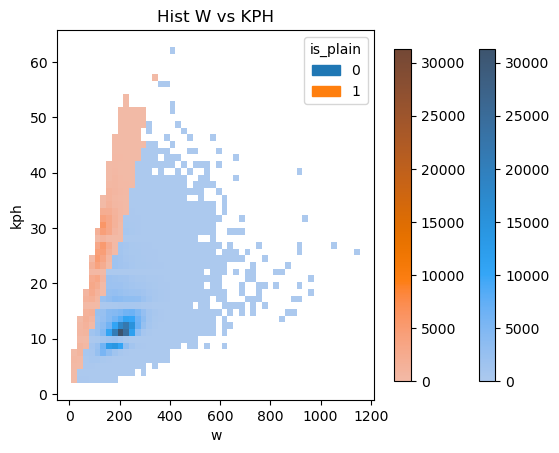

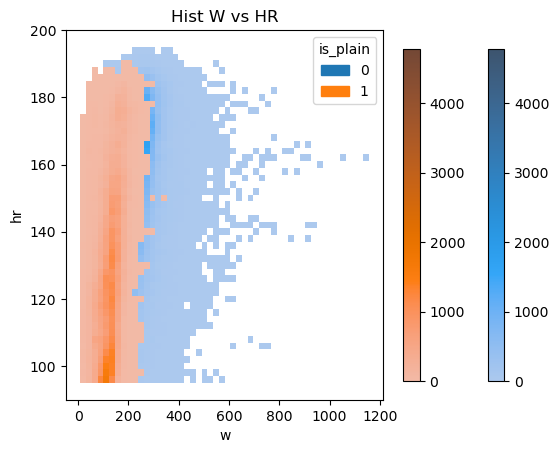

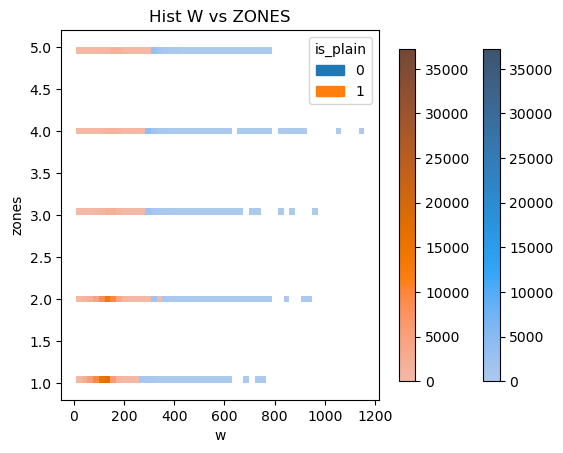

In [19]:
tuples: tuple[tuple[str]] = (
    ('w', 'slope'),
    ('w', 'kph'),
    ('w', 'hr'),
    ('w', 'zones'),
)

for x, y in tuples:

    sns.histplot(
    data, x=x, y=y,
    bins=50, discrete=(False, False), 
    cbar=True, cbar_kws=dict(shrink=0.9),
    hue='is_plain'
    )
    plt.title('Hist {} vs {}'.format(
            x.upper(), y.upper()
        ))
    plt.show()

Para crear la variable que permita determinar el nivel de eficiencia, se tomará en cuenta la variable de trabajo mecánico por kilogramo para determinar el esfuerzo y la zona cardiaca para determinar el esfuerzo energético.

In [20]:
data['w_hr'] = data['w'] / data['hr']
data[['w', 'w_hr']].describe()

,w,w_hr
count,612960.000000,612960.000000
mean,190.544604,1.298298
std,61.243342,0.368136
min,8.707316,0.051017
25%,147.310726,1.078618
50%,190.581569,1.282840
75%,228.427590,1.488022
max,1156.663561,7.184246


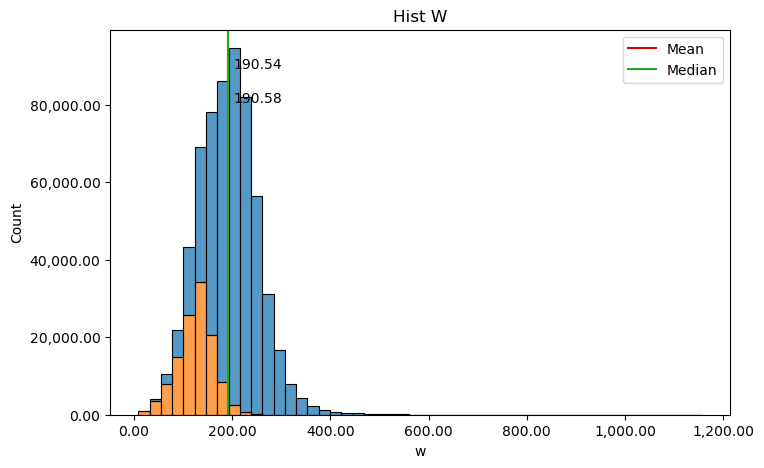

In [21]:
hist(data, 'w', bins=50, hue='is_plain')

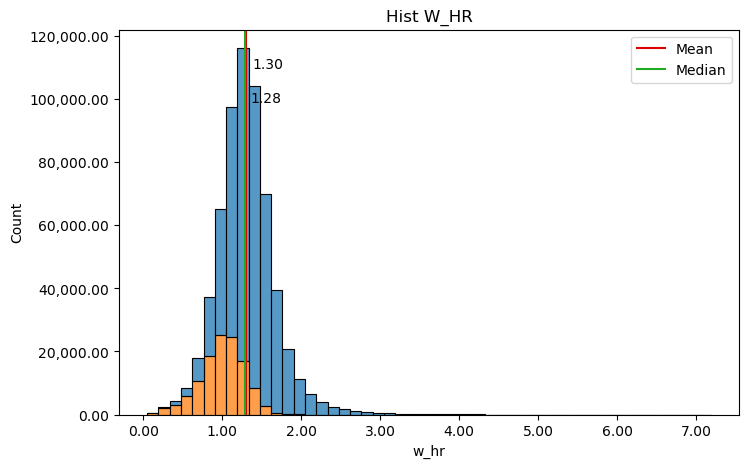

In [22]:
hist(data, 'w_hr', bins=50, hue='is_plain')

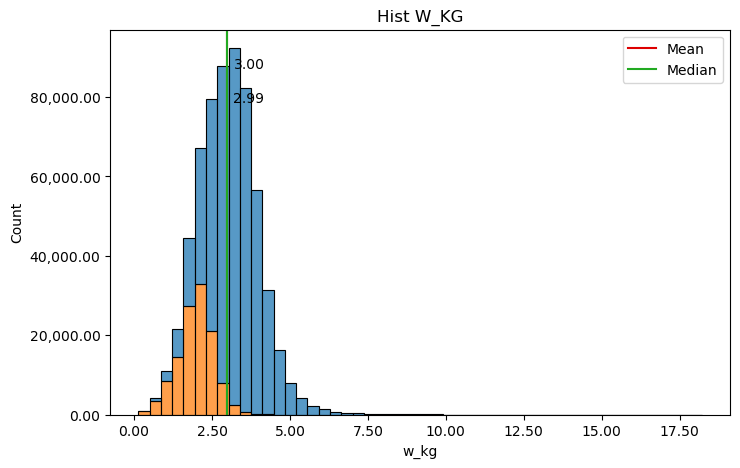

In [24]:
data['w_kg'] = data['w'] / data['weight']
hist(data, 'w_kg', bins=50, hue='is_plain')

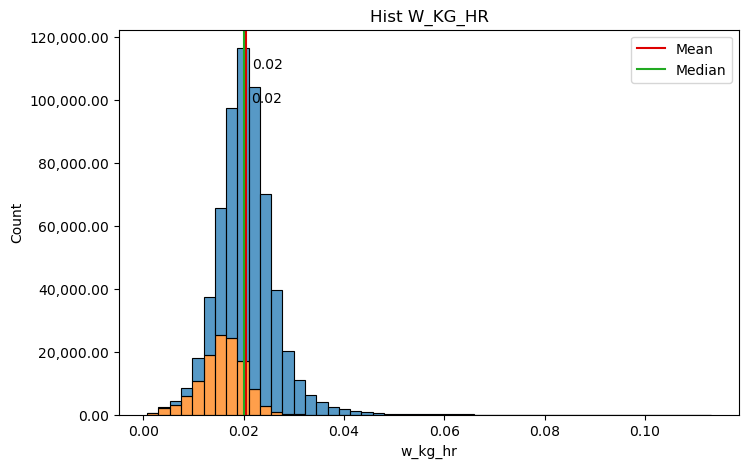

In [45]:
data['w_kg_hr'] = data['w_kg'] / data['hr']
hist(data, 'w_kg_hr', bins=50, hue='is_plain')

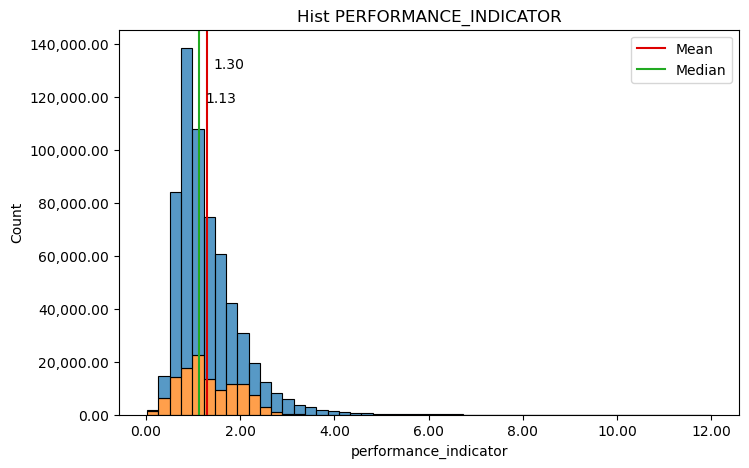

In [47]:
data['performance_indicator'] = data['w_kg'] / data['zones']
hist(data, 'performance_indicator', bins=50, hue='is_plain')

In [41]:
data.sample(5)

,secs,cad,hr,km,kph,watts,alt,lon,lat,slope,...,datetime,date,weight,zones,is_plain,w,w_hr,w_kg,w_kg_hr,w_zone
66697,3539,81.0,126.0,24.0306,24.1992,0.0,2595.2,-74.222585,4.818161,0.634921,...,2022-07-17 07:49:54,2022-07-17,64.6,2,1,136.203771,1.080982,2.108418,0.016733,0.527104
505038,5923,80.0,170.0,30.4426,10.5840,0.0,2847.0,-74.123902,4.935058,10.000000,...,2022-08-14 07:45:28,2022-08-14,64.6,4,0,262.479658,1.543998,4.063153,0.023901,2.031576
113816,4753,88.0,149.0,25.5111,12.0960,0.0,2664.2,-74.157495,4.929135,7.619050,...,2023-09-03 07:06:58,2023-09-03,62.2,2,0,233.730422,1.568661,3.757724,0.025220,0.939431
332943,1184,82.0,108.0,6.6033,12.0960,0.0,2590.2,-74.209923,4.801496,5.714290,...,2024-03-17 07:55:21,2024-03-17,62.0,1,0,187.611818,1.737146,3.025997,0.028018,0.605199
324017,4365,68.0,153.0,11.7597,10.5840,0.0,1377.4,-74.327728,4.988494,7.619050,...,2022-06-12 09:34:22,2022-06-12,66.9,3,0,217.645490,1.422520,3.253296,0.021263,1.084432
